# Basic AI/DS lecture materials

The contents are as follows

** 1 | Application of principal component analysis (PCA) to two-dimensional distributed data **

** 2 | Application of PCA to Regression Problems **

In [16]:
import matplotlib.pyplot as plt
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
random.seed(1) # Do not change the default random seed

## 1 | Application of principal component analysis (PCA) to two-dimensional distributed data
 　Create a data set of two-dimensional distributions in the form of circles, ellipses, and rings, and perform coordinate transformations of the data using PCA.


First, run the following cell to generate the two-dimensional distributions A, B, and C.

In [17]:
# data A（circle）, B（ellipse）, C（ring） generation
N = 200 # Number of data

A, B, C = [], [], []

# 円型の二次元分布データAを作成
# x=R*cos(θ)*s, y=R*sin(θ)s
# 0<s<1, 0<θ<2*π は乱数生成
R = 1 # 円の半径
for i in range(N):
    theta = 2 * np.pi * random.random()
    s = random.random() # x, yの縮小率
    x, y = R * np.cos(theta) * s, R * np.sin(theta) * s
    A.append((x, y))
A = np.array(A)
# 楕円型の二次元分布データBを作成
# x = (a*cos(t)*cos(θ)-b*sin(t)*sin(θ))*s + offset_x
# y = (a*sin(t)*cos(θ)+b*cos(t)*sin(θ))*s + offset_y
# 0<s<1, 0<θ<2*π は乱数生成
a, b = 2, 1# 回転前の楕円の横縦
t = np.pi/4 # 楕円の回転角
offset_x, offset_y = 0.3, 0.5 # 楕円の中心を少し原点からずらす
for i in range(N):
    theta = 2 * np.pi * random.random()
    s = random.random() # x, yの縮小率
    x = (a * np.cos(t) * np.cos(theta) - b * np.sin(t) * np.sin(theta)) * s + offset_x
    y = (a * np.sin(t) * np.cos(theta) + b * np.cos(t) * np.sin(theta)) * s + offset_y
    B.append((x, y))
B = np.array(B)
# リング型の二次元分布データCを作成
# x=R*cos(θ)*s, y=R*sin(θ)s
# 0.5<s<1, 0<θ<2*π は乱数生成
R = 1 # 円の半径
R_s = 0.5 # リングの内円の半径
for i in range(N):
    theta = 2 * np.pi * random.random()
    s = random.uniform(R_s/R, 1) # x, yの縮小率
    x,y = R * np.cos(theta) * s, R * np.sin(theta) * s
    C.append((x, y))
C = np.array(C)


Run the following cell to see the respective plots of the two-dimensional distributions A, B, and C.

/Users/Alchemist/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


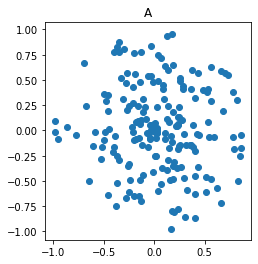

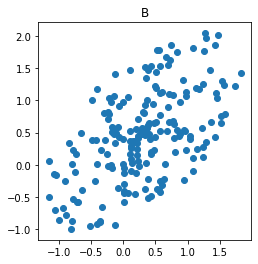

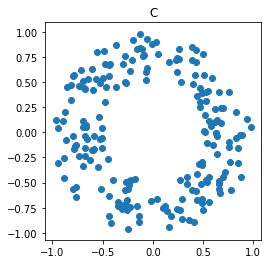

In [3]:
for data, title in zip([A, B, C], ["A", "B", "C"]):
    plt.scatter(data[:,0], data[:,1])
    plt.axes().set_aspect('equal')
    plt.title(title)
    plt.show()

Transformation of data to new coordinate axes is performed by PCA.

In [4]:
# PCA automatically using sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(A)
print("eigenvectors:", pca.components_) 
print("eigenvalues: ", pca.explained_variance_ratio_)

eigenvectors: [[ 0.28945487 -0.95719166]
 [-0.95719166 -0.28945487]]
eigenvalues:  [0.55961392 0.44038608]


Run the following cell to see the principal component vector for data A

/Users/Alchemist/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


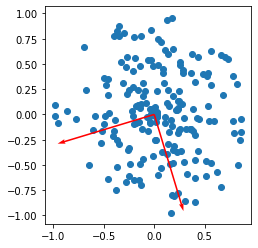

In [5]:
pcv_A = pca.components_
plt.scatter(A[:,0], A[:,1])
for v1, v2 in pcv_A:
    plt.quiver(0,0,v1,v2,angles='xy',scale_units='xy',scale=1, color="red")

plt.axes().set_aspect('equal')
plt.show()

Transform data A using the "transform" method of PCA object

In [6]:
pcaA = pca.transform(A)

You can check the shape of the data A after mapping by executing the following cell

/Users/Alchemist/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


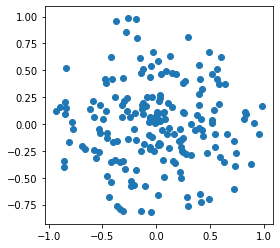

In [7]:
plt.scatter(pcaA[:,0], pcaA[:,1])
plt.axes().set_aspect('equal')
plt.show()

---
##### Task 1
　For data B and C, perform the same principal component analysis with n_components = 2, and write the transformed data as pca_B and pca_C. Also, check the principal component vector and the data after the coordinate transformation.

In [8]:
# Complete this cell
pca = 
pcv_B =  # Principal component vector of B
pcaB =  # B after coordinate transformation
eigenvalues_B = # eigenvaluese of PCA on B


pca = 
pcv_C =  # Principal component vector of C
pcaC =  # C after coordinate transformation
eigenvalues_C =  # eigenvaluese of PCA on C

print("B eigenvalues: ", eigenvalues_B)
print("B eigenvalues", pcv_B)

print("B eigenvalues: ", eigenvalues_C)
print("B eigenvalues", pcv_C)

SyntaxError: invalid syntax (<ipython-input-8-fcd38fe2e364>, line 2)

In [9]:
# Run this cell and check the principal component vector
for data, pcv, title in zip([B, C], [pcv_B, pcv_C], ["B", "C"]):
    plt.scatter(data[:,0], data[:,1])
    for v1, v2 in pcv:
        plt.quiver(0,0,v1,v2,angles='xy',scale_units='xy',scale=1, color="red")
        plt.title("principal component vector: "+ title)
    plt.show()

NameError: name 'pcv_B' is not defined

In [ ]:
# Run this cell to see B, C after the coordinate transformation
for pca_data, title in zip([pcaB, pcaC], ["pcaB", "pcaC"]):
    plt.scatter(pca_data[:,0], pca_data[:,1])
    plt.axes().set_aspect('equal')
    plt.title(title)
    plt.show()

Note: You can also implement PCA by yourself using numpy as shown below. Note that you need to set the data center to 0 when you implement it yourself. In sklearn's PCA class, the data centering is done automatically.

In [ ]:
# implement PCA by yourself using numpy
from numpy.linalg import eig
A_centered = A - np.mean(A, axis=0)
cov_matrix = np.cov(A_centered, rowvar=False)
eig_val, eig_vec = eig(cov_matrix)
n_components = 2
eig_index = np.argsort(eig_val)[::-1][:n_components]
eig_val = eig_val[eig_index]
eig_vec = eig_vec.T[eig_index]
eig_vec # principal component vectors

## 2 | Application of PCA to Regression Problems
   PCA is sometimes used as a data preprocessing method in regression problems. Here, we consider the problem of regressing a target variable of $y=x_{1}^{2}+x_{2}^{2}$.



In [18]:
# 目的変数の作成
y_A = A[:,0]**2 + A[:,1]**2
y_B = B[:,0]**2 + B[:,1]**2
y_C = C[:,0]**2 + C[:,1]**2

Run the following cell to see the value of $y=x_{1}^{2}+x_{2}^{2}$ for x1 and x2 in datasets A, B, and C respectively

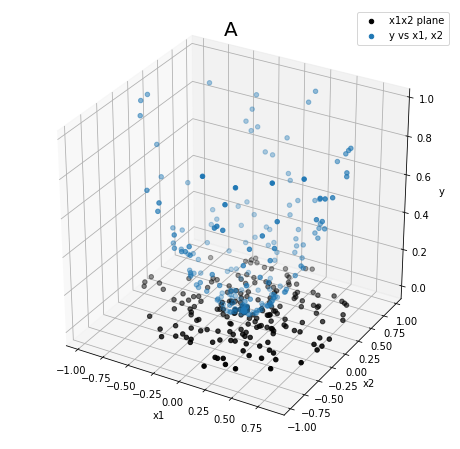

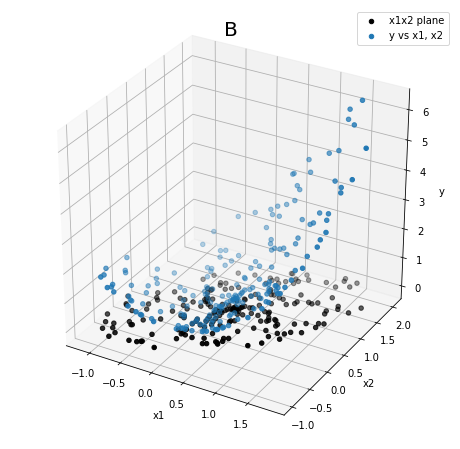

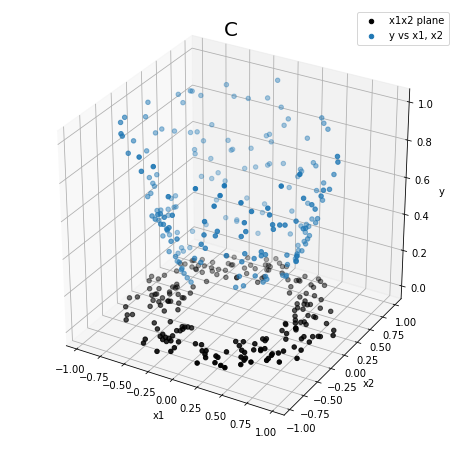

In [19]:
for data, y, title in zip([A, B, C], [y_A, y_B, y_C], ["A", "B", "C"]):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.scatter(data[:,0], data[:,1], 0, color="black", label="x1x2 plane")
    ax.scatter(data[:,0], data[:,1], y, label="y vs x1, x2")
    ax.set_title(title, size = 20)
    plt.legend()
    plt.show()

Before using PCA, we first create a regression model using the untransformed x1 and x2. Here, we create a data set that includes x1^2,  x2^2 and the constant data for the bias parameter.

In [20]:
# データセットの作成
X_A = np.array([
    [1 for x in range(len(A))],
    A[:,0]**2,
    A[:,1]**2
]).T


X_B = np.array([
    [1 for x in range(len(B))],
    B[:,0]**2,
    B[:,1]**2
]).T

X_C = np.array([
    [1 for x in range(len(C))],
    C[:,0]**2,
    C[:,1]**2
]).T

Split the dataset into training data and test data

In [21]:
from sklearn.model_selection import train_test_split

# Do not change the default random seed
X_A_train, X_A_test, y_A_train, y_A_test = train_test_split(X_A, y_A, random_state=1)
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, random_state=1)
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, y_C, random_state=1)
print("train data: ", len(y_A_train))
print("test data: ", len(y_A_test))

train data:  150
test data:  50


Create a linear model using train data.

In [22]:
from sklearn.linear_model import LinearRegression

reg_A = LinearRegression().fit(X_A_train, y_A_train)
reg_B = LinearRegression().fit(X_B_train, y_B_train)
reg_C = LinearRegression().fit(X_C_train, y_C_train)

The fitted model can be used to predict the value of y by giving X to the "prediction" method as follows.
~~~
reg_A.prediction(X_A_test)
~~~

Let's check the prediction error of each linear model by MAE (Mean Absolute Error).

In [23]:
from sklearn.metrics import mean_absolute_error
pred_A = reg_A.predict(X_A_test)
pred_B = reg_B.predict(X_B_test)
pred_C = reg_C.predict(X_C_test)
print("reg_A score: ", mean_absolute_error(y_A_test, pred_A))
print("reg_B score: ", mean_absolute_error(y_B_test, pred_B))
print("reg_C score: ", mean_absolute_error(y_C_test, pred_C))

reg_A score:  6.891514268969612e-17
reg_B score:  5.084127563392826e-16
reg_C score:  2.331468351712829e-16


By running the following cell, we can see a plot of the actual y versus the model prediction on the test data.

In [ ]:
X_A_test[:,1]

In [ ]:
for y, pred, title in zip([y_A_test, y_B_test, y_C_test], [pred_A, pred_B, pred_C], ["A", "B", "C"]):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel("real y")
    ax.set_ylabel("predicted y")
    ax.scatter(y, y, label="real y vs real y")
    ax.scatter(y, pred, label="real y vs predicted y")
    ax.set_title(title, size = 20)
    plt.legend()
    plt.show()

Also, in the following cell, you can see the parameter values of the optimized linear model.

In [ ]:
for reg, title in zip([reg_A, reg_B, reg_C], ["A", "B", "C"]):
    plt.bar(range(3), reg.coef_, tick_label=["1", "x1^2", "x2^2"])
    plt.title(title)
    plt.show()

---
##### Task 2
　Perform a regression of y using the data pca_A, pca_B, and pca_C, which are coordinate transformations of data A, B, and C in PCA.
 
 Name the variables in the regression model as reg_pcaX (X = A, B, C) and create data with [1, ξ1^2, ξ2^2] as rows as input data to the model (ksi1, ksi2 are the data after coordinate transformation with PCA)


In [ ]:
# Complete this cell

# Creating Data
X_pcaA = 

X_pcaB = 

X_pcaC = 

# Split the data set into training and test data
# Do not change the default random seed
X_pcaA_train, X_pcaA_test, y_pcaA_train, y_pcaA_test = train_test_split(X_pcaA, y_A, random_state=1)
X_pcaB_train, X_pcaB_test, y_pcaB_train, y_pcaB_test = train_test_split(X_pcaB, y_B, random_state=1)
X_pcaC_train, X_pcaC_test, y_pcaC_train, y_pcaC_test = train_test_split(X_pcaC, y_C, random_state=1)

# Create a regression model
reg_pcaA = 
reg_pcaB = 
reg_pcaC = 

# Using regression models to predict test data
pred_pcaA = 
pred_pcaB = 
pred_pcaC = 

In [ ]:
# Run this cell to see the prediction error of the regression model
print("reg_pcaA score: ", mean_absolute_error(y_pcaA_test, pred_pcaA))
print("reg_pcaB score: ", mean_absolute_error(y_pcaB_test, pred_pcaB))
print("reg_pcaC score: ", mean_absolute_error(y_pcaC_test, pred_pcaC))

In [ ]:
# Run this cell to plot the predicted y vs. real y in the test data
for y, pred, title in zip([y_pcaA_test, y_pcaB_test, y_pcaC_test], [pred_pcaA, pred_pcaB, pred_pcaC], ["A", "B", "C"]):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel("real y")
    ax.set_ylabel("predicted y")
    ax.scatter(y, y, label="real y vs real y")
    ax.scatter(y, pred, label="real y vs predicted y")
    ax.set_title(title, size = 20)
    plt.legend()
    plt.show()

In [ ]:
# Run this cell to check the parameter values of the optimized linear model
for reg, title in zip([reg_pcaA, reg_pcaB, reg_pcaC], ["pcaA", "pcaB", "pcaC"]):
    plt.bar(range(3), reg.coef_, tick_label=["1", "xi1^2", "xi2^2"])
    plt.title(title)
    plt.show()